## Model a dual activator system with an AND gate

There are now two factors X and Y. Both are activators and their effects are multiplied. This means the model's activation function is

$\beta \frac{x^{H}}{K_{zx}^{H}+x^{H}} \frac{y^{H}}{K_{zy}^{H}+y^{H}} = \beta \frac{(x/K_{zx})^{H}}{1+(x/K_{zx})^{H}} \frac{(y/K_{zy})^{H}}{1+(y/K_{zy})^{H}}$

where $\beta$ is the maximal rate of transcription of Z, $H$ is the Hill coefficient (using the same value for both expressions, for the sake of simplicity), $K_{zx}$ is the activation threshold for X on Z, $K_{zy}$ is the activation threshold for Y on Z, and now $X$ and $Y$ are both parameters that will change over time.

The full model is

$\frac{dZ}{dt} = \beta \frac{x^{H}}{K_{zx}^{H}+x^{H}} \frac{y^{H}}{K_{zy}^{H}+y^{H}} - \alpha Z$

where $\alpha$ is the degradation rate constant.

In [5]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

def dual_activator_AND( t, statevars, params):
    Z = statevars[0]
    beta = params[0]
    H = params[1]
    Kzx = params[2]
    Kzy = params[3]
    alpha = params[4]
    X = params[5]
    Y = params[6]
    
    dstatevarsdt = np.zeros( (1,) )
    dstatevarsdt[0] = beta * ((X**H)/(Kzx**H+X**H)) * ((Y**H)/(Kzy**H+Y**H)) - alpha*Z
    return dstatevarsdt

### Simulate the model

Use $\beta=1$, $K_{zx}=0.5$, $H=5$, $K_{zy}=0.5$, and $\alpha=1$. X should be 0 until t=0.5, and 1 thereafter. Y should be 0 until t=5, and 1 thereafter. 

Simulate from t=0 to t=20 with a time steps of 0.01.

In [6]:
# Assign each parameter a name by value
beta = 1;
Kzy = 0.5;
Kzx = 0.5;
H = 5;
alpha = 1;

# Set up parameters so that X is off, and then X is on, and then both X and Y  are on.
time_x_on = 0.5
time_y_on = 5

params_off = (beta, H, Kzx, Kzy, alpha,0,0);
params_Xon = (beta, H, Kzx, Kzy, alpha,1,0);
params_XYon = (beta, H, Kzx, Kzy, alpha,1,1);

# Make versions of the model X,Y off/on pattern
mf_off = lambda t,y : dual_activator_AND(t,y, params_off)
mf_Xon = lambda t,y : dual_activator_AND(t,y, params_Xon)
mf_XYon = lambda t,y : dual_activator_AND(t,y, params_XYon)

# Simulate first with X off, then turn X on, then turn both on.
sol1 = scipy.integrate.solve_ivp( fun=mf_off, t_span=(0,time_x_on), y0=(0,), 
                                t_eval=np.arange(0,time_x_on,.01) )
sol2 = scipy.integrate.solve_ivp( fun=mf_Xon, t_span=(time_x_on,time_y_on), y0=sol1.y[:,-1], 
                                t_eval=np.arange(time_x_on,time_y_on,.01) )
sol3 = scipy.integrate.solve_ivp( fun=mf_XYon, t_span=(time_y_on,20), y0=sol2.y[:,-1], 
                                t_eval=np.arange(time_y_on,20,.01) )

### Plot the simulation

Plot X over time in an upper subplot, Y over time in a middle subplot, and Z over time in a lower subplot.

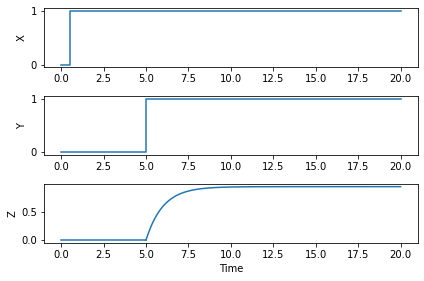

In [8]:
plt.subplot( 3, 1, 1)
plt.plot( [sol1.t[0],time_x_on,time_x_on,sol3.t[-1]], [0,0,1,1] )
plt.ylabel( "X")
plt.subplot( 3, 1, 2)
plt.plot( [sol1.t[0],time_y_on,time_y_on,sol3.t[-1]], [0,0,1,1] )
plt.ylabel( "Y")

plt.subplot( 3, 1, 3 )
plt.plot(sol1.t, sol1.y.T); #Simulation before signal on
plt.gca().set_prop_cycle(None) # this resets the color cycle
plt.plot(sol2.t, sol2.y.T); #Simulation after X signal on
plt.gca().set_prop_cycle(None) # this resets the color cycle
plt.plot(sol3.t, sol3.y.T); #Simulation after X and Y signal on
plt.xlabel( 'Time')
plt.ylabel( "Z")
plt.tight_layout()

## Model a dual activator system with an OR gate

There are now two factors X and Y. Both are activators and their effects are combined so that the presence of one or the other can activate transcription, but it is not as simple as just adding them together. This means the model's activation function is

$\beta (\frac{(X/K_zx)^H}{1+(X/K_zy)^H+(Y/K_zy)^H} + \frac{(Y/K_zy)^H}{1+(X/K_zy)^H+(Y/K_zy)^H})$

where $\beta$ is the maximal rate of transcription of Z, $H$ is the Hill coefficient (using the same value for both expressions, for the sake of simplicity), $K_{zx}$ is the activation threshold for X on Z, $K_{zy}$ is the activation threshold for Y on Z, and now $X$ and $Y$ are both parameters that will change over time.

The full model is

$\frac{dZ}{dt} = \beta (\frac{(X/K_zx)^H}{1+(X/K_zy)^H+(Y/K_zy)^H} + \frac{(Y/K_zy)^H}{1+(X/K_zy)^H+(Y/K_zy)^H}) - \alpha Z$

where $\alpha$ is the degradation rate constant.

In [9]:
def dual_activator_OR( t, statevars, params):
    Z = statevars[0]
    beta = params[0]
    H = params[1]
    Kzx = params[2]
    Kzy = params[3]
    alpha = params[4]
    X = params[5]
    Y = params[6]
    
    dstatevarsdt = np.zeros( (1,) )
    denom = 1 + (X/Kzx)**H + (Y/Kzy)**H
    dstatevarsdt[0] = beta * ((X/Kzx)**H/denom + (Y/Kzy)**H/denom) - alpha*Z
    return dstatevarsdt

### Simulate the model

Use $\beta=1$, $K_{zx}=0.5$, $H=5$, $K_{zy}=0.5$, and $\alpha=1$. X should be 0 until t=0.5, and 1 thereafter. Y should be 0 until t=5, and 1 thereafter. 

Simulate from t=0 to t=20 with a time steps of 0.01.

In [10]:
# Assign each parameter a name by value
beta = 1;
Kzy = 0.5;
Kzx = 0.5;
H = 5;
alpha = 1;

# Set up parameters so that X is off, and then X is on, and then both X and Y  are on.
time_x_on = 0.5
time_y_on = 5

params_off = (beta, H, Kzx, Kzy, alpha,0,0);
params_Xon = (beta, H, Kzx, Kzy, alpha,1,0);
params_XYon = (beta, H, Kzx, Kzy, alpha,1,1);

# Make versions of the model X,Y off/on pattern
mf_off = lambda t,y : dual_activator_OR(t,y, params_off)
mf_Xon = lambda t,y : dual_activator_OR(t,y, params_Xon)
mf_XYon = lambda t,y : dual_activator_OR(t,y, params_XYon)

# Simulate first with X off, then turn X on, then turn both on.
sol1 = scipy.integrate.solve_ivp( fun=mf_off, t_span=(0,time_x_on), y0=(0,), 
                                t_eval=np.arange(0,time_x_on,.01) )
sol2 = scipy.integrate.solve_ivp( fun=mf_Xon, t_span=(time_x_on,time_y_on), y0=sol1.y[:,-1], 
                                t_eval=np.arange(time_x_on,time_y_on,.01) )
sol3 = scipy.integrate.solve_ivp( fun=mf_XYon, t_span=(time_y_on,20), y0=sol2.y[:,-1], 
                                t_eval=np.arange(time_y_on,20,.01) )

### Plot the simulation

Plot X over time in an upper subplot, Y over time in a middle subplot, and Z over time in a lower subplot.

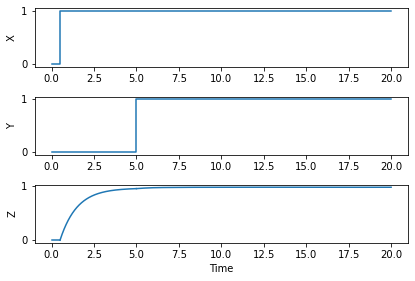

In [11]:
plt.subplot( 3, 1, 1)
plt.plot( [sol1.t[0],time_x_on,time_x_on,sol3.t[-1]], [0,0,1,1] )
plt.ylabel( "X")
plt.subplot( 3, 1, 2)
plt.plot( [sol1.t[0],time_y_on,time_y_on,sol3.t[-1]], [0,0,1,1] )
plt.ylabel( "Y")

plt.subplot( 3, 1, 3 )
plt.plot(sol1.t, sol1.y.T); #Simulation before signal on
plt.gca().set_prop_cycle(None) # this resets the color cycle
plt.plot(sol2.t, sol2.y.T); #Simulation after X signal on
plt.gca().set_prop_cycle(None) # this resets the color cycle
plt.plot(sol3.t, sol3.y.T); #Simulation after X and Y signal on
plt.xlabel( 'Time')
plt.ylabel( "Z")
plt.tight_layout()